# Projct: Investigate a Dataset - [No-show appointments]


# Table of contents

1. Introduction
2. Data Wrangling
3. Exploratoryn Data Analysis
4. conclusion


# Introduction

In this project i have investigated a dataset of no show appointments for public hospitals in Brazil. The data has some patients characteristics such gender, age and others. The analysis is focused on trying to find the patients characteristics that affect if they show up for their appointments

### Dataset Description

#### load the data into a dataframe

In [253]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

### Columns in the Dataset


In [254]:
# The Dataset has the following columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### Determining the data types of the columns

In [255]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

# Questions for the Analysis

The analysis is trying to find attributes that indicate why certain patients showed up for their appointments and the characteristis that have an influence on attending the appointments
1. What is the percetage of patients who missed their appointments
2. How does the gender affect the rate of showing up for appointments
3. Does receiving an SMS influence patients showing up
4. Does the day of the appointment influence showing up for appointments
5. Does the age of patient influence their attendance
6. How do the other in factors influece the rate of patients attending or missing appointments



# Data Wrangling

### Number of entries and columns

In [256]:
# Determine the shape of the dataframe
df.shape

(110527, 14)

The dataframe has 110527 entries and 14 columns

#### Renaming columns


In [257]:
# replacing hypens with underscores and uppercase with lowercase
df.rename(columns=lambda i: i.lower().replace("-", "_"), inplace=True)

In [258]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [259]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Missing values in the dataframe

In [260]:
# finding how many null value are in the dataframe
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

The data has no null values in all the columns

### Duplicate appointments in the dataframe

In [261]:
# Check how many appointment are repeated 
df.appointmentid.duplicated().sum()

0

The data has no duplicate appointments 


### Converting appintmentday type to datetime

In [262]:
df["appointmentday"] = pd.to_datetime(df["appointmentday"]).dt.date.astype("datetime64[ns]")

### Create a new column appintment_day(day of the appointment)

In [263]:
df["appointment_day"] = df.appointmentday.dt.day_name()

In [264]:
columns_list = list(df.columns.values)
print(columns_list)

['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show', 'appointment_day']


### Unique values in each column

In [265]:
def unique(columns):
    for column in columns: 
        if len(df[column].unique()) <= 5:
            print(f"{column}: \n {df[column].unique()}")


In [266]:
unique(columns_list)

gender: 
 ['F' 'M']
scholarship: 
 [0 1]
hipertension: 
 [1 0]
diabetes: 
 [0 1]
alcoholism: 
 [0 1]
handcap: 
 [0 1 2 3 4]
sms_received: 
 [0 1]
no_show: 
 ['No' 'Yes']


#### Here are some observations
1. The handcamp column has inconsistent values
2. The patientid is not relevant to the analysis


In [267]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'appointment_day'],
      dtype='object')

## Delete inconsistent and irrelevant columns

In [268]:
df.drop(["patientid", "handcap"], axis=1, inplace=True)
df.sample(3)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show,appointment_day
30248,5633766,F,2016-04-28T09:48:13Z,2016-05-17,58,RESISTÊNCIA,0,0,0,0,0,No,Tuesday
12443,5753503,M,2016-05-31T14:13:22Z,2016-05-31,85,ILHA DE SANTA MARIA,0,0,0,0,0,No,Tuesday
39038,5642672,M,2016-04-29T16:45:08Z,2016-05-03,27,GRANDE VITÓRIA,0,0,0,0,1,No,Tuesday


# Exploratory Data analysis

###           Statistical summary of the data

In [269]:
df.describe()

,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Observations from the statistical summary
#### 1. age 
The average age of the patients is 37 years and 75% of the patieints are 55 years or below

#### sms_received
75% of the patients received an sms for the appointment

#### alcoholism 
Less than 25% of the population are alcoholics



## Histograms representation


#### A function to create histograms

In [270]:
def histogram(column):
    df[column].hist();

###### no_show

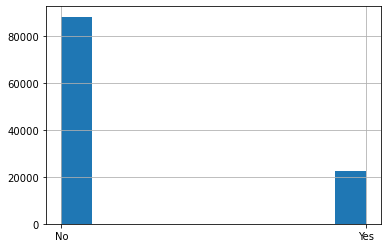

In [271]:
histogram("no_show")

Majority of the patients attended their appointments


#### sms_received

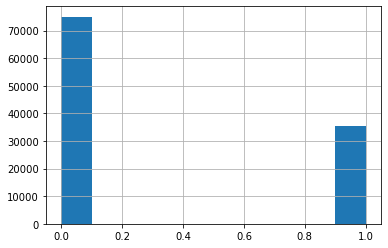

In [272]:
histogram("sms_received")

#### alcoholism

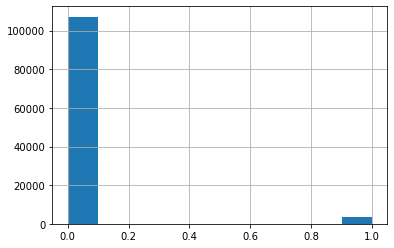

In [273]:
histogram("alcoholism")

#### diabetes

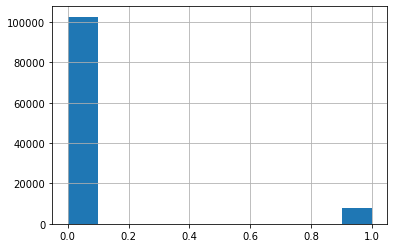

In [274]:
histogram("diabetes")

#### hipertension

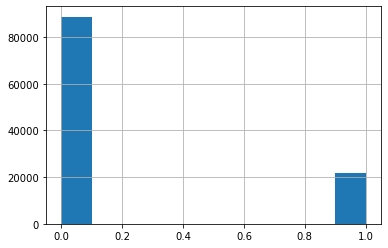

In [275]:
histogram("hipertension")

#### scholarship


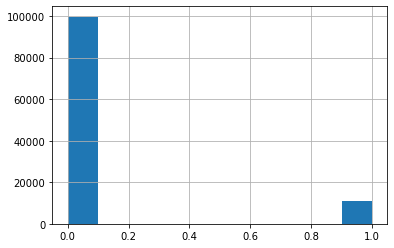

In [276]:
histogram("scholarship")

#### gender

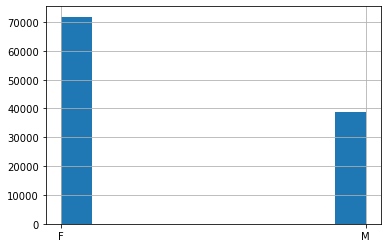

In [277]:
histogram("gender")

## Research Question 1: What is the percetage of patients who missed their appointments

In [278]:
total = df.shape[0]
missed = len(df.query("no_show == 'Yes'"))
attended = len(df.query("no_show == 'No'"))
percentage_missed = round((missed / total) * 100)
percentage_attended = round((attended / total) * 100)
print(f"""
{percentage_missed}% of the patients missed their appointments
{percentage_attended}% of the patients showed up for their appointments""")


20% of the patients missed their appointments
80% of the patients showed up for their appointments


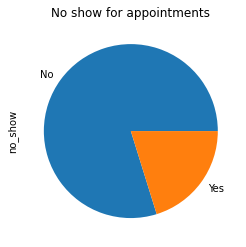

In [279]:
df.no_show.value_counts().plot(kind = "pie", title="No show for appointments", );

## Research Question 2: How does the gender affect the rate of showing up for appointments

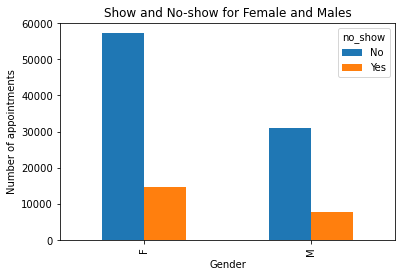

In [280]:
female = df.query("gender == 'F'")
male = df.query("gender == 'M'")

female_missed = len(female.query("no_show == 'Yes'"))
male_missed = len(male.query("no_show == 'Yes'"))
total_female = female.shape[0]
total_male = male.shape[0]

percentage_missed_female = round((female_missed / total_female) * 100)
percentage_missed_male = round((male_missed / total_male) * 100)

df.groupby(["gender", "no_show"]).gender.count().unstack().plot.bar(legend=True,)
plt.title("Show and No-show for Female and Males");
plt.xlabel("Gender")
plt.ylabel("Number of appointments");

In [281]:
print(f"""
There were {female.shape[0]} female appointments and {total_female} which is {percentage_missed_female}% missed their appointments
There were {male.shape[0]} male appointments and {total_male} which is {percentage_missed_male}% missed their appointments
""")


There were 71840 female appointments and 71840 which is 20% missed their appointments
There were 38687 male appointments and 38687 which is 20% missed their appointments



## Research Question 3: Does receiving an SMS influence patients showing up

    I would like to find out if receiving or not receiving an SMS influenced the rate of showing up for appointments.

In [282]:
sms = list(df.sms_received.value_counts())
print(f"Received: {sms[1]}")
print(f"Not received: {sms[0]}")
received_percentage = round((sms[1] / df.shape[0]) * 100)
print(f"Received an sms percentage = {received_percentage}%")

Received: 35482
Not received: 75045
Received an sms percentage = 32%


Most of the patients did not receive an sms notification as only 32% received an sms

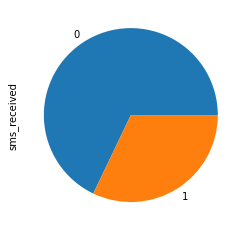

In [283]:
df.sms_received.value_counts().plot(kind="pie");

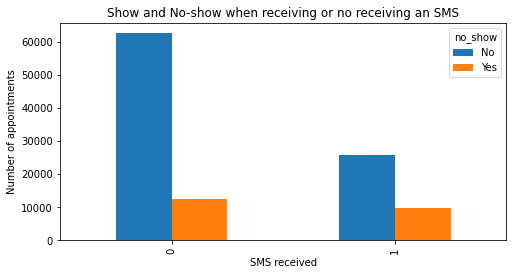

In [284]:
df.groupby(["sms_received", "no_show"]).sms_received.count().unstack().plot.bar(legend=True,figsize=(8,4))
plt.title("Show and No-show when receiving or no receiving an SMS");
plt.xlabel("SMS received")
plt.ylabel("Number of appointments");


In [285]:
received = df.query("sms_received == 1")
not_received= df.query("sms_received == 0")

received_missed = len(received.query("no_show == 'Yes'"))
not_received_missed = len(not_received.query("no_show == 'Yes'"))
received_attended = len(received.query("no_show == 'No'"))
not_received_attended  = len(not_received.query("no_show == 'No'"))

percentage_received_missed = round((received_missed / received.shape[0]) * 100)
percentage_received_attended = round((received_attended / received.shape[0]) * 100)
percentage_not_received_missed = round((not_received_missed / not_received.shape[0]) * 100)
percentage_not_received_attended = round((not_received_attended / not_received.shape[0]) * 100)

print(f"""
{percentage_received_attended}% of the patients who recieved an SMS attended their appointments
{percentage_received_missed}%of the patients who recieved an SMS missed their appoinments
{percentage_not_received_attended}% of the patients did not recieve an SMS attended their appoinments
{percentage_not_received_missed}% of the patients did not recieve an SMS missed their appoinments
""")


72% of the patients who recieved an SMS attended their appointments
28%of the patients who recieved an SMS missed their appoinments
83% of the patients did not recieve an SMS attended their appoinments
17% of the patients did not recieve an SMS missed their appoinments



## Research Question: Does the day of the appointment influence showing up for appointments

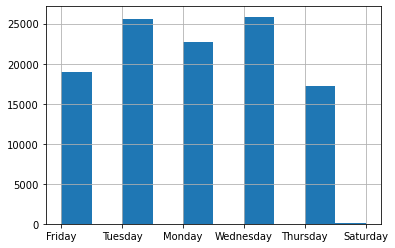

In [286]:
histogram("appointment_day")

The appointments are from Monday to Saturday and are almost evenly disributed apart from Saturday which have just a few appointments

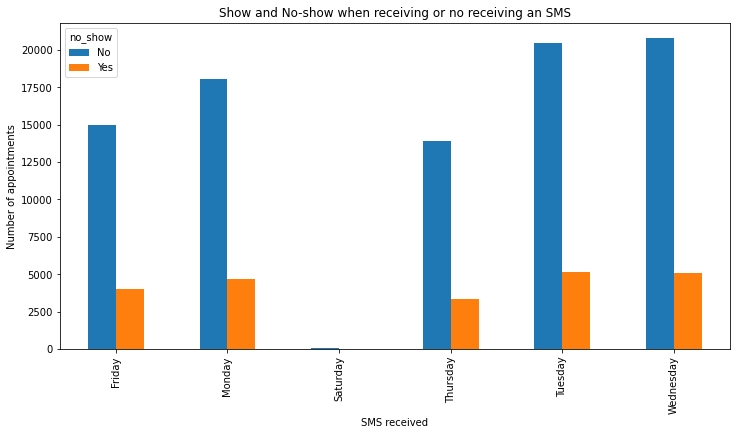

In [287]:
df.groupby(["appointment_day", "no_show"]).appointment_day.count().unstack().plot.bar(legend=True,figsize=(12,6))
plt.title("Show and No-show when receiving or no receiving an SMS");
plt.xlabel("SMS received")
plt.ylabel("Number of appointments");

From the chart the ratio of showing up and not for each day is almost the same

## Research Question 5: Does the age of patient influence their attendance


The range of the ages of the patients is quite large so we create age groups to represent the patients age

#### Creating age groups for the patients

In [288]:
rages = [(df.age <= 10), (df.age <= 18), (df.age <= 35), (df.age <= 50), (df.age <= 70), df.age > 70]

In [289]:
age_groups = ["Below 11", "11-18", "19-35", "36-50", "51-70","Above 70"]

In [290]:
df["age_group"] = np.select(rages, age_groups)
df.age_group.value_counts()

51-70       26850
19-35       24137
36-50       22100
Below 11    18750
11-18       10117
Above 70     8573
Name: age_group, dtype: int64

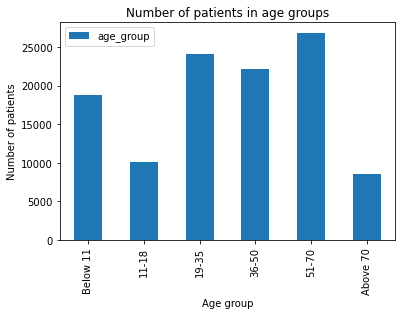

In [291]:
df.age_group.value_counts().loc[age_groups].plot.bar(legend=True)
plt.title('Number of patients in age groups')
plt.xlabel("Age group")
plt.ylabel("Number of patients");

In [292]:
len(df.query("age_group == 'Below 11'"))

18750

In [293]:
total = df.shape[0]
for i in age_groups:
    number = len(df.query(f"age_group == '{i}'"))
    agegroup_perct = round(number / total * 100)
    print(f"{i} = {agegroup_perct}% of the total patients")
        

Below 11 = 17% of the total patients
11-18 = 9% of the total patients
19-35 = 22% of the total patients
36-50 = 20% of the total patients
51-70 = 24% of the total patients
Above 70 = 8% of the total patients


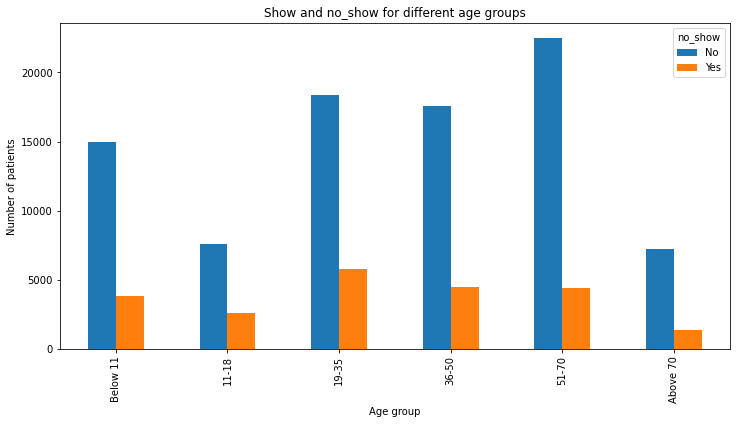

In [294]:
df.groupby(["age_group", "no_show"]).age_group.count().unstack().loc[age_groups].plot.bar(legend=True,figsize=(12,6))
plt.title("Show and no_show for different age groups");
plt.xlabel("Age group")
plt.ylabel("Number of patients");

### Pecentage of attending and missing appointments for the various age groups

In [295]:
def percent(category):
    dataframe = df.query(f"age_group == '{category}'")
    missed = len(dataframe.query("no_show == 'Yes'"))
    attended = len(dataframe.query("no_show == 'No'"))
    percentage_missed = round((missed / dataframe.shape[0]) * 100)
    percentage_attended = round((attended / dataframe.shape[0]) * 100)
    print(f"{percentage_attended}% of patients {category} years attended their appointments while {percentage_missed}% missed")

##### Below 11 years

In [296]:
percent(age_groups[0])

80% of patients Below 11 years attended their appointments while 20% missed


#### From 11 to 18 years

In [297]:
percent(age_groups[1])

75% of patients 11-18 years attended their appointments while 25% missed


#### from 19 to 35 years

In [298]:
percent(age_groups[2])

76% of patients 19-35 years attended their appointments while 24% missed


#### From 36 to 50 years

In [299]:
percent(age_groups[3])

80% of patients 36-50 years attended their appointments while 20% missed


#### From 51 to 70 years

In [300]:
percent(age_groups[4])

84% of patients 51-70 years attended their appointments while 16% missed


#### Above 70 years

In [301]:
percent(age_groups[-1])

84% of patients Above 70 years attended their appointments while 16% missed


## Research Question 6: How do the other in factors influece the rate of patients attending or missing appointments

In [302]:
factors = ["scholarship", "hipertension", "diabetes", "alcoholism", ]

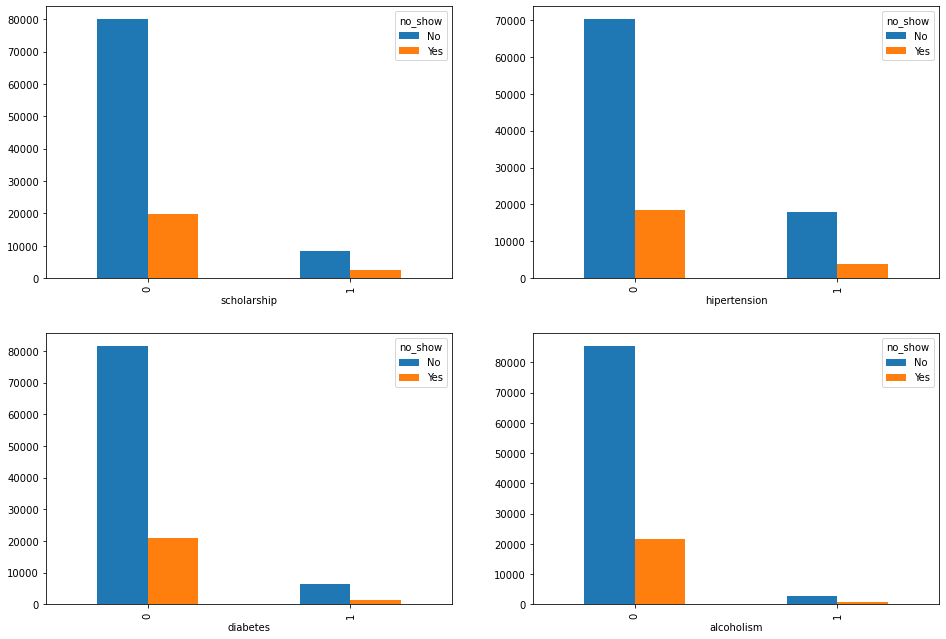

In [303]:
fig = plt.figure(figsize=(16,11))
for i, factor in enumerate(factors):
    graph = fig.add_subplot(2, 2, i + 1)
    df.groupby([factor, "no_show"])[factor].count().unstack("no_show").plot(ax=graph, kind="bar");

This factors (scholarship, hipertension, diabetes and alcoholism) have a similar pattern in affecting the show or no_show of patients. 

In [304]:
print()

# Conclusion

After investigating most of the independent variables and also the dependent variable(no_show) the main limitation of the analysis was distribution of patients in the independent variables.
 
 The most important insights are:
 1. An average of 20% of the appointments were missed
 2. The gender of the patient had little or no effect on the rate of showing as the percentage for attending of both females and male is 20%
 3. Receving an SMS was not effective as percentage of the people who missed their appointments was higher for those who received an SMS than those who did not
 4. The appointment day had not significant effect on the rate for patients attending their appointments
 5. Most of the patients were middle aged
 5. Most of the young patients missed their appoinment while most of the eldery patients attended their appontments
 6. For the other factors the rate of attending or missing for different categories is almost similar. There is no clear indication of these factors having a big impact of the rate of patients attending or missing appointments